***
# <center>***Big Data with Hadoop Tools and Technologies***
***

### ***Apache Hadoop***
Apache Hadoop is an open-source framework written in Java that supports processing of large data sets in streaming access pattern across clusters in a distributed computing environment. It can store a large volume of structured, semi-structured, and unstructured data in a distributed file system (DFS) and process them in parallel. It is a highly scalable and cost-effective storage plat form. Scalability of Hadoop refers to its capability to sustain its performance even under highly increasing loads by adding more nodes. Hadoop files are written once and read many times. The contents of the files cannot be changed. Large number of computers interconnected and working together as a single system is called a **cluster**. Hadoop clusters are designed to store and analyze the 
massive amount of disparate data in a distributed computing environment in a cost-effective manner.

### ***Architecture of Apache Hadoop***
the Hadoop architecture consists of two layers, the storage layer is the HDFS layer, and on the top of it is the MapReduce engine. 

### ***Hadoop Ecosystem Components Overview***
- Hadoop ecosystem comprises four different layers
    1) Data storage layer;
    2) Data Processing layer;
    3) Data access layer;
    4) Data management layer
 
**The data storage layer** comprises HDFS and HBase. In HDFS data is stored in a distributed environment. HBase is a column-oriented database to store a structured database.

**The data processing layer** comprises MapReduce and YARN. Job processing is handled by MapReduce while the resource allocation and job scheduling and monitoring is handled by YARN.

**The data access layer** comprises Hive, Pig, Mahout, Avro, and SQOOP. Hive is a query language to access the data in HDFS. Pig is a data analysis high-level scripting language. Mahout is a machine learning platform. Avro is a data serialization framework. SQOOP is a tool transfer data from the traditional database to HDFS and vice versa.

**The data management layer** interacts with the end user. It comprises Oozie, Chukwa, Flume, and Zookeeper. Oozie is a workflow scheduler. Chukwa is used for data collection and monitoring. Flume is used to direct the data flow from a source to HDFS.

***
## ***Hadoop Storage***
***

***HDFS (Hadoop Distributed File System)***

The Hadoop distributed file system is designed to store large data sets with streaming access pattern running on low-cost commodity hardware. It does not require highly reliable expensive hardware. The data set generated from multiple sources is stored in a HDFS in a write once, read many times pattern and analysis is performed on the data set to extract knowledge from it. HDFS is not suitable for applications that require low latency access to the data. HBase is a suitable alternative for such applications requiring low latency.An HDFS stores the data by partitioning the data into small chunks. Blocks of a single file are replicated to provide fault tolerance and availability. If the blocks are corrupt or if the disk or machine fails, the blocks can be retrieved by replicating the blocks across physically separate machines.

***Why HDFS?***

With a single machine, to read 500 GB of data it takes approximately 22.5 minutes when the machine has four I/O channels and each channel is capable of processing the task at a speed of 100 MB/s. On top of it, data analysis has to be performed, which will still increase the overall time consumed. If the same data is distributed over 100 machines with the same number of I/O channels in each machine, then the time taken would be 13.5 seconds approximately. This is essentially what Hadoop does, instead of storing the data at a single location, Hadoop stores in a distributed fashion in DFS, where the data is stored in hundreds of data nodes, and the data retrieval occurs in parallel. This approach eliminates the bottleneck and improves performance.

***HDFS Architecture***

Hadoop Distributed File System (HDFS) is the storage component of the Hadoop ecosystem, designed to handle large datasets with high reliability and scalability. HDFS architecture is based on a master-slave model and follows a block-based storage strategy. Here’s an overview:

- `Namenode:` The master node, called the Namenode, is responsible for managing the filesystem namespace and regulating access to files. It keeps track of the metadata (like the directory tree and the locations of data blocks) but doesn't store the actual data.

- `Datanodes:` These are the worker nodes that store the data. A file in HDFS is split into large blocks (typically 128 MB or 256 MB) and distributed across multiple Datanodes. Each block is replicated across several Datanodes to ensure fault tolerance and data availability.

- `Block Replication:` HDFS ensures data reliability through replication. By default, each block of data is replicated three times across different Datanodes. This replication not only provides fault tolerance but also improves data access performance.

- `Heartbeat and Block Reports:` Datanodes periodically send heartbeats and block reports to the Namenode to confirm their operational status and update the Namenode on the blocks they are storing. This helps the Namenode keep a current view of the cluster's health and data distribution.

- `High Availability:` To avoid a single point of failure, HDFS supports high availability through a standby Namenode. This standby node takes over in case the primary Namenode fails, ensuring continuous operation.

- `Data Writing and Reading:` When a client writes data to HDFS, the Namenode determines the placement of data blocks and replicates them across Datanodes. During read operations, the client interacts with the Namenode to get the locations of the data blocks and then reads directly from the Datanodes.

In essence, HDFS is designed for large-scale, distributed data storage, offering reliability, fault tolerance, and high throughput access to data. It is particularly suited for big data applications that require processing and analyzing massive datasets across distributed systems.

***HDFS Read/Write Operation***

**Write Operation:**
 - `Client Request:` The client initiates a write request to the Namenode, specifying the file to be written.

 - `Block Allocation:` The Namenode checks the file system namespace for permission and allocates blocks for the file. It also decides the Datanodes where the blocks will be stored.

 - `Data Transmission:` The client starts writing data in chunks. For each chunk, a pipeline is established between the chosen Datanodes.

 - `Replication:` The first Datanode in the pipeline receives the chunk and writes it to its local storage. Then, it forwards the chunk to the next Datanode in the pipeline, which repeats the process. This ensures block replication across multiple Datanodes.

 - `Confirmation:` Once all replicas are written, the Datanodes send an acknowledgment back up the pipeline to the client, confirming successful write completion.

**Read Operation:**

- `Client Request:` The client initiates a read request to the Namenode, specifying the file to be read.
- `Block Locations:` The Namenode checks the file system namespace and retrieves the locations of the data blocks stored on the Datanodes.
- `Data Retrieval:` The client contacts the closest Datanode (based on network topology) and requests the data blocks.
- `Block Reading:` The Datanode reads the requested blocks and sends them back to the client.
- `Sequential Access:` If the file is large and split across multiple blocks, the client sequentially retrieves each block, assembling the complete file.

This architecture ensures efficient and reliable data storage and retrieval, leveraging the distributed nature of HDFS. It also provides fault tolerance, as the replication factor allows data to be available even if some Datanodes fail.

***Features of HDFS***

Hadoop Distributed File System (HDFS) is specifically designed to handle large datasets with high efficiency and reliability. Here are some of its key features:

- `Scalability:` HDFS can easily scale out to include thousands of nodes, accommodating growing data storage and processing demands.
- `Fault Tolerance:` By default, each data block in HDFS is replicated three times across different nodes. This ensures data availability and reliability even if some nodes fail.
- `High Throughput:` HDFS is optimized for large files and high-throughput data access rather than low-latency data access. It supports quick data transfer and processing for massive datasets.
- `Streaming Data Access:` HDFS is designed for batch processing, where data is written once and read multiple times. It supports streaming data access patterns, which are ideal for large-scale data analysis applications.
- `Large Data Block Size:` The default block size in HDFS is typically 128 MB or 256 MB, much larger than traditional file systems. This reduces the overhead of managing numerous smaller blocks and improves performance for large files.
- `Metadata Management:` The Namenode manages the filesystem namespace and metadata, while the actual data is stored on Datanodes. This separation allows efficient metadata management and access.
- `Replication Management:` HDFS manages data replication automatically. It balances the data across Datanodes and ensures that the replication factor is maintained, redistributing data as needed.
- `Rack Awareness:` HDFS uses a rack-awareness algorithm to improve data reliability and network bandwidth utilization. It places replicas of data blocks on nodes in different racks to ensure data availability in case of rack failures.
- `Data Integrity:` HDFS performs regular checksums on data blocks to ensure data integrity. If a block is found to be corrupt, it is automatically replaced with a good replica.
- `Support for Heterogeneous Hardware:` HDFS can run on commodity hardware, making it cost-effective to scale. It supports different types of hardware and can adapt to varying performance characteristics.

These features make HDFS a robust and reliable storage system, particularly suited for big data applications that require processing and analyzing large volumes of data efficiently.

***
## ***Hadoop Computation***
***

Hadoop is an open-source framework that facilitates the distributed processing of large data sets across clusters of computers using simple programming models. It is designed to scale up from single servers to thousands of machines, each offering local computation and storage. 

#### ***Key components include:***
  - **Hadoop Distributed File System (HDFS):** It provides high-throughput access to application data.
  - **MapReduce:** A programming model for large-scale data processing.
  - **YARN (Yet Another Resource Negotiator):** Manages resources in clusters.

### **MapReduce**:  

MapReduce is the batch-processing programming model for the Hadoop framework, which adopts a divide-and-conquer principle. It is highly scalable, reliable, fault tolerant, and capable of processing input data with any format. It processes the data in a parallel and distributed computing environment, which supports only batch workloads. Its performance reduces the processing time significantly compared to the traditional batch-processing paradigm, as the traditional approach moves the data from storage platform to the processing platform, whereas the MapReduce processing paradigm resides in the framework were the data actually reside. Given figure shows the MapReduce model.

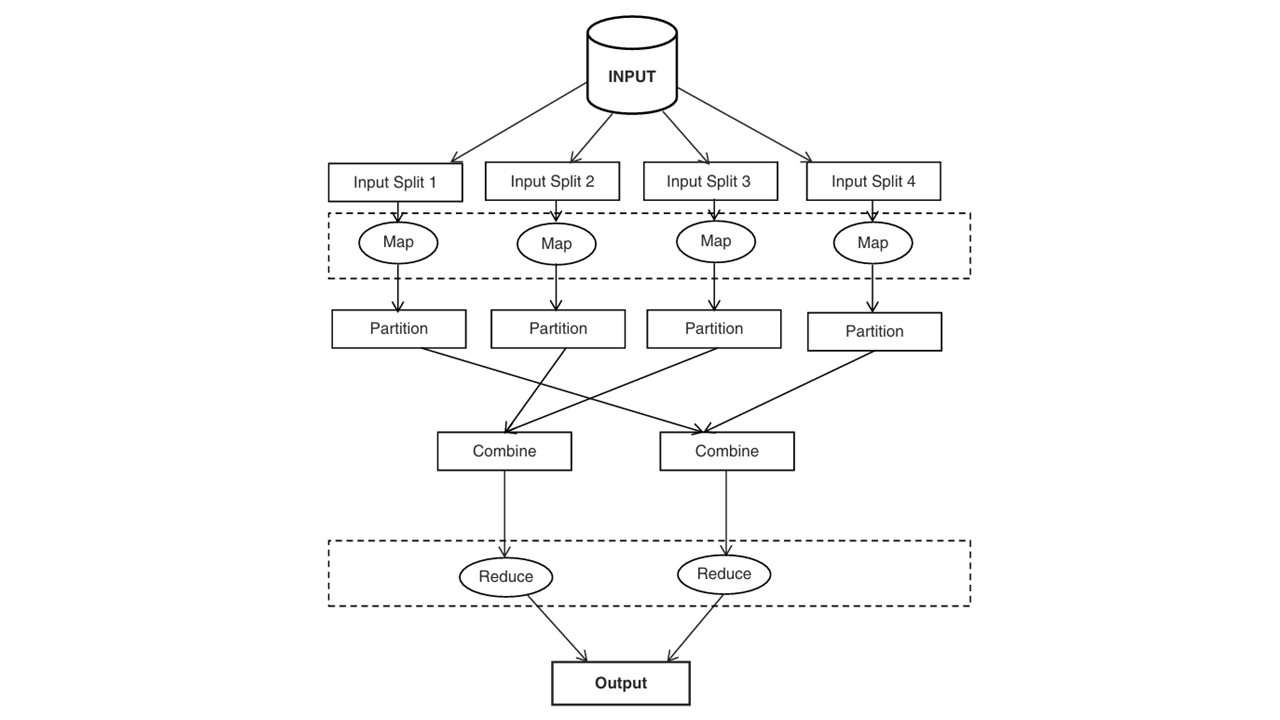

In [4]:

from IPython.display import Image
Image(filename="MapReduce model.png") 


The processing of data in MapReduce is implemented by splitting up the entire process into two phases, namely, the map phase and the reduce phase. There are several stages in MapReduce processing where the map phase includes map, combine, and partition, and the reduce phase includes shuffle and sort and reduce. Combiner and partitioner are optional depending on the processing to be performed on the input data. The job of the programmer ends up with providing the MapReduce program and the input data, and rest of the processing is carried out by the framework, thus simplifying the use of the MapReduce paradigm.
  - **Mapper**: Map is the first stage of the map phase, during which a large data set is broken down into multiple small blocks of data. Each data block is resolved into multiple key-value pairs (K1, V1) and processed using the mapper or the map job. Each 
data block is processed by individual map jobs. The mapper executes the logic defined by the user in the MapReduce program and produces another intermediate key and value pair as the output. The processing of all the data blocks is done in parallel and the same key can have multiple values. The output of the mapper is represented as list (K2, V2).
  - **Combiner**: The output of the mapper is optimized before moving the data to the reducer. This is to reduce the overhead time taken to move larger data sets between the mapper and the reducer. The combiner is essentially the reducer of the map job and logically groups the output of the mapper function, which are multiple key-value pairs. In combiner the keys that are repeated are combined, and the values corresponding to the key are listed.
  - **Reducer**: Reducer performs the logical function specified by the user in the MapReduce program. Each reducer runs in isolation from other reducers, and they do not communicate with each other. The input to the reducer is sorted based on the key. Reducer processes the value of each key, value-pairs it, and receives and produces another key-value pair as the output. The output key-value pair may be either the same as the input key-value pair or modified based on the user-defined function. The output of the reducer is written back to the DFS.
  - **JobTracker and TaskTracker**: Hadoop MapReduce has one JobTracker and several TaskTrackers in a master/slave architecture. Job tracker runs on the master node, and TaskTracker runs on the slave node. There is always only one TaskTracker per slave node. TaskTracker and NameNode run in one machine while JobTracker and DataNode run in another machine, making each node perform both computing and storage tasks. TaskTracker is responsible for workflow management and resource management. Parallel processing of data using MapReduce is handled by JobTracker. JobTracker accepts requests from client for job submissions, schedules tasks that are to be run by the slave nodes, administers the health of the slave nodes, and monitors the progress of tasks that are assigned to TaskTracker. JobTracker is a single point of failure, and if it fails, all the tasks running on the cluster will eventually fail; hence, the machine holding the JobTracker should be highly reliable. The communication between TaskTracker and the client as well as between TaskTracker and JobTracker is established through remote procedure calls (RPC). TaskTracker sends a Heartbeat signal to JobTracker to indicate that the node is alive. ***Additionally*** it sends the information about the task that it is handling if it 
is processing a task or its availability to process a task otherwise. After a specific 
time interval if the Heartbeat signal is not received from TaskTracker, it is assumed 
to be dead.


#### **MapReduce Algorithm**:

A MapReduce task has a mapper and a reducer class. The mapper class performs tokenizing the input, mapping, shuffling, and sorting while the reducer class takes the output of the mapper class as its input and performs a searching task to find the matching pairs and reduce them. MapReduce uses various algorithms to divide a task into multiple smaller tasks and assign them to multiple nodes. 
MapReduce algorithms are essential in assigning map and reduce tasks to appropriate nodes in the cluster. Some of the mathematical algorithms used by the MapReduce paradigm to implement the tasks are sorting, searching, indexing, and Term Frequency–Inverse Document Frequency (TF-IDF).

  - A ***sorting*** algorithm is used by the MapReduce algorithm to process the data and analyze them. The key-value pair from the mapper is sorted with the sorting algorithm. The RawComparator class is used by the mapper class to gather similar key-value pairs. These are intermediate key-value pairs, and they are sorted by Hadoop automatically to form (K1, {V1,V1. . .}) before presenting them to the reducer.
  - A ***searching*** algorithm is used to find a match from the given pattern if the filename and text are passed as input. For example, in a given file with employee name and corresponding salary, a searching algorithm with the file name as input to find out the employee with maximum salary will output the employee name with highest salary and corresponding salary.
  - ***Indexing*** in MapReduce points to a data and its corresponding address. The indexing technique used in MapReduce is called inverted index. Search engines such as Google use an inverted indexing technique.
  -  ***TF-IDF*** is the acronym for Term Frequency–Inverse Document Frequency. It is a 
text-processing algorithm, and the term frequency indicates the number of times a 
term occurs in a file. Inverse Document Frequency is calculated by dividing the 
number of files in a database by the number of files where a particular term appears


#### **Limitations of MapReduce**

The MapReduce daemon is indeed the most successful parallel processing framework. MapReduce is used by the research community to solve data-intensive problems in environmental science, finance, and bioinformatics. However, MapReduce also has its limitations. The intrinsic limitation of MapReduce is oneway scalability in its design. It is designed in a way to scale up to process typically large data sets but with a restriction to process smaller data sets. The reason is the fact that the NameNode memory space cannot be wasted to hold the metadata of a large number of smaller data sets. Also NameNode is the single point of failure, and when the NameNode goes down, the cluster becomes unavailable, restricting the system from being highly available. While high availability of the system is the major requirement of many of the applications, it became imperative to design a system that is not only scalable but also highly available.

The **reduce phase** cannot start until the map task is complete. Similarly, starting a new map task before the completion of the reduce task in the previous application is not possible in standard MapReduce. Hence, each application has to wait until the previous application is complete. When map tasks are executing, the reducer nodes are idle; similarly, when reduce a task is in execution, the mapper nodes are idle, which results in improper utilization of resources. Also there may be a requirement for resources to execute map task while the resources are idle waiting for the map task to be complete and to start the execution of the reduce task.

## **Yet Another Resource Negotiator (YARN)**

To overcome the drawbacks of the Hadoop MapReduce architecture, the Hadoop **Yarn architecture** was developed. In Hadoop Yarn the responsibilities of JobTracker, that is, resource management and job scheduling, are split up to improve performance. Each job request has its own ApplicationMaster. 

The main purpose of evolution of the YARN architecture is to reinforce more data processing models such as Apache Storm, Apache Spark, Apache Giraph, and more than just supporting MapReduce. YARN splits the responsibilities of JobTracker into two daemons, a global ResourceManager and per-application ApplicationMaster. ResourceManager takes care of resource management while per-application ApplicationMaster takes care of job scheduling and monitoring. ResourceManager is a cluster level component managing resource alloca
tion for applications running in the entire cluster. The responsibility of the TaskTracker is taken up by the ApplicationMaster, which is application specific and  negotiates resources for the applications from the ResourceManager and works with NodeManager to execute the tasks. Hence, in the architecture of YARN the JobTracker and TaskTracker are replaced by ResourceManager and ApplicationMaster respectively.


#### **Core Components of YARN**
 - ResourceManager;
 - ApplicationMaster; and
 - NodeManager.

**ResourceManager** :  A ***ResourceManager*** is a one-per-cluster application that manages the allocation of resources to various applications. The two major components of ResourceManager are **`ApplicationsManager`** and **`scheduler`**. **ApplicationsManager** manages the ApplicationMasters across the cluster and is responsible for accepting or rejecting the applications, and upon accepting an application, it provides resources to the ApplicationMaster for the execution of the application, monitors the status of the running applications, and restarts the applications in case of failures. **Scheduler** allocates resources based on FIFO, Fair, and capacity policies to the applications that are submitted to the cluster. It does not monitor the job status whereas its job is only to allocate resources to the applications based on its requirements. **ClientService** is the interface through which the client interacts with the ResourceManager and handles all the application submission, termination, and so forth. **ApplicationMasterService** responds to RPC from the **ApplicationMaster** and interacts with applications. 

**ResourceTrackerService** interacts with **ResourceManager** for resource negotiation by ApplicationMaster. **ApplicationMasterLauncher** launches a container to ApplicationMaster when a client submits a job. Security component generates ContainerToken and ApplicationToken to access container and application respectively.

**NodeManager** :  The **NodeStatusUpdater** establishes the communication between ResourceManager and NodeManager and updates ResourceManager about the status of the containers running on the node. The ContainerManager manages all the containers running on the node. The ContainerExecutor interacts with the operating system to launch or cleanup container processes. NodeHealthCheckerService monitors the health of the node and sends the Heartbeat signal to ResourceManager. Security component verifies all the incoming requests are authorized by ResourceManager. 

The MapReduce framework of Hadoop 1.0 architecture supports only batch processing. To process the applications in real time and near–real time the data has to be taken out from Hadoop into other databases. To overcome the limitations of Hadoop 1.0, Yahoo has developed YARN.

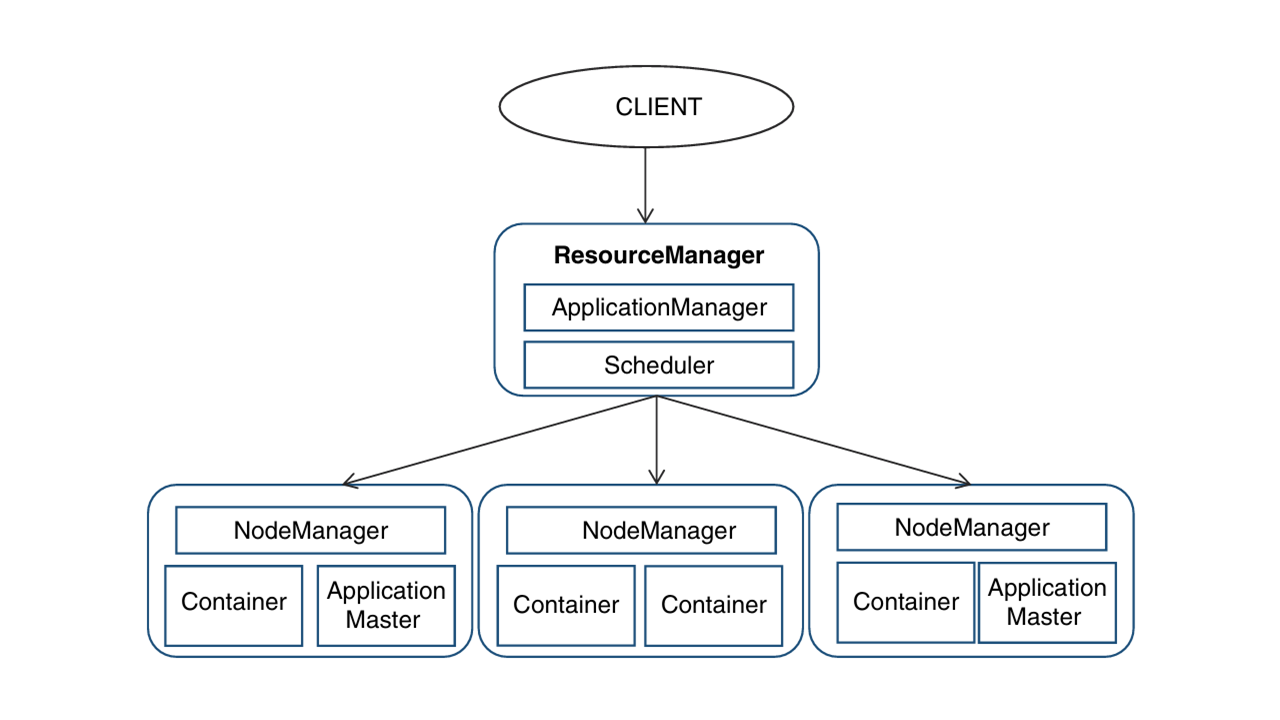

In [6]:

from IPython.display import Image
Image(filename="YARN architecture.png") 


#### **YARN Scheduler**
 
The YARN architecture has a scheduler that allocates resources according to the applications’ requirements depending on some scheduling policies. The different scheduling policies available in YARN architecture are:
  - **`FIFO scheduler:`** The FIFO (first in, first out) scheduler is a simple and easy-to-implement scheduling policy. It executes the jobs in the order of submission: jobs submitted first will be executed first.
  - **`Capacity scheduler:`** The capacity scheduler allows multiple applications to share the cluster resources securely so that each running application is allocated resources. This type of scheduling is implemented by configuring one or more queues, with each queue assigned a calculated share of total cluster capacity.
  - **`Fair scheduler:`** Fair scheduling policy is the efficient way of sharing cluster resources. Allocation of resources are done in a way that all the applications running on a cluster get a fairly equal share of the resources on a given time period. If an application running on a cluster requests all the resources and simultaneously if another job is submitted, the fair scheduler allocates the resources that are free in the previous application so that all the running applications are allocated a fairly equal 
share of resources.